In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

uploaded = files.upload()





Saving StudentsPerformance.csv to StudentsPerformance.csv




The dataset file StudentsPerformance.csv was uploaded successfully into Colab.







In [18]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Displayed the first five rows of the dataset using df.head().

The preview confirms that the dataset contains demographic details (gender, race/ethnicity, parental education, lunch type, test preparation course) along with scores in math, reading, and writing. The data appears structured correctly and ready for analysis.

In [4]:
df.info()
df.describe()

for col in ['gender', 'parental level of education', 'lunch', 'test preparation course']:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

gender distribution:
gender
female    518
male      482
Name: count, dtype: int64

parental level of education distribution:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degre

The dataset has 1,000 entries and 8 columns, with 5 categorical variables and 3 numerical score variables. There are no missing values.

Gender is fairly balanced, with 518 females and 482 males.

 Parental education is skewed towards some college (226) and associate’s degree (222), while the smallest group is master’s degree (59).

 Most students have standard lunch (645) compared to free/reduced lunch (355).

 A majority of students did not take the test preparation course (642), while 358 completed it.



In [5]:
df.isnull().sum()



,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


The check for missing values shows 0 null entries across all columns.

In [6]:
df.groupby("gender")[['math score','reading score','writing score']].mean()
df.groupby("lunch")[['math score','reading score','writing score']].mean()
df.groupby("parental level of education")[['math score','reading score','writing score']].mean()
df.groupby("test preparation course")[['math score','reading score','writing score']].mean()



,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


from matplotlib import pyplot as plt
_df_0['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['math score'].plot(kind='line', figsize=(8, 4), title='math score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['reading score'].plot(kind='line', figsize=(8, 4), title='reading score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['writing score'].plot(kind='line', figsize=(8, 4), title='writing score')
plt.gca().spines[['top', 'right']].set_visible(False)

The code uses groupby() with mean() to calculate the average math, reading, and writing scores across categories like gender, lunch type, parental education, and test preparation. This helps identify performance patterns between different groups.

The results show clear trends:

Gender: Males score slightly higher in math, while females perform better in
reading and writing.

Lunch Type: Students with standard lunch score higher across all subjects than those with free/reduced lunch.

Parental Education: Higher parental education is associated with better student performance, with the top averages among bachelor’s and master’s degree holders.

Test Preparation: Students who completed the test prep course scored 5–8 points higher on average across all subjects.




In [7]:
df[['math score','reading score','writing score']].corr()
pd.crosstab(df['gender'], df['test preparation course'], normalize='index')
pd.crosstab(df['lunch'], df['parental level of education'], normalize='index')
df['total_score'] = df[['math score','reading score','writing score']].sum(axis=1)
df.groupby(['gender','lunch'])['total_score'].mean()
df.groupby(['parental level of education','test preparation course'])[['math score','reading score','writing score']].mean()


math score  \
parental level of education test preparation course               
associate's degree          completed                 71.829268   
                            none                      65.571429   
bachelor's degree           completed                 73.282609   
                            none                      66.902778   
high school                 completed                 65.000000   
                            none                      60.992857   
master's degree             completed                 70.600000   
                            none                      69.307692   
some college                completed                 71.454545   
                            none                      64.892617   
some high school            completed                 66.701299   
                            none                      61.078431   

                                                     reading score  \
parental level of education test preparation course                  
associate's degree          completed                    76.170732   
                            none                         67.857143   
bachelor's degree           completed                    76.739130   
                            none                         70.611111   
high school                 completed                    67.839286   
                            none                         63.450000   
master's degree             completed                    78.250000   
                            none                         73.897436   
some college                completed                    75.987013   
                            none                         66.087248   
some high school            completed                    70.948052   
                            none                         63.911765   

                                                     writing score  
parental level of education test preparation course                 
associate's degree          completed                    76.817073  
                            none                         65.842857  
bachelor's degree           completed                    78.695652  
                            none                         69.986111  
high school                 completed                    68.053571  
                            none                         60.207143  
master's degree             completed                    80.100000  
                            none                         73.410256  
some college                completed                    76.519481  
                            none                         64.872483  
some high school            completed                    70.363636  
                            none                         60.754902

from matplotlib import pyplot as plt
_df_8['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['math score'].plot(kind='line', figsize=(8, 4), title='math score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['reading score'].plot(kind='line', figsize=(8, 4), title='reading score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['writing score'].plot(kind='line', figsize=(8, 4), title='writing score')
plt.gca().spines[['top', 'right']].set_visible(False)

The code explores deeper relationships in the dataset:  
- corr() checks correlations between math, reading, and writing scores.  
- crosstab()examines how gender relates to test preparation and how lunch type relates to parental education.  
- A new column total_score (sum of all three subjects) is created to evaluate overall performance.  
- Grouped means compare total scores across gender + lunch, and subject averages across parental education + test preparation.  

**Findings:**  
- **Correlation:** Math, reading, and writing scores are strongly positively correlated, meaning good performance in one subject is linked to good performance in others.  
- **Gender × Test Prep:** Both genders benefit from test preparation, though proportions of participation vary.  
- **Lunch × Education:** Students on free/reduced lunch are more common in lower parental education groups, suggesting socio-economic influence.  
- **Total Score:** Across both genders, students with standard lunch consistently achieve higher total scores.  
- **Education × Test Prep:** Test preparation improves performance across all education levels, with the largest gains among students whose parents have lower education levels.  


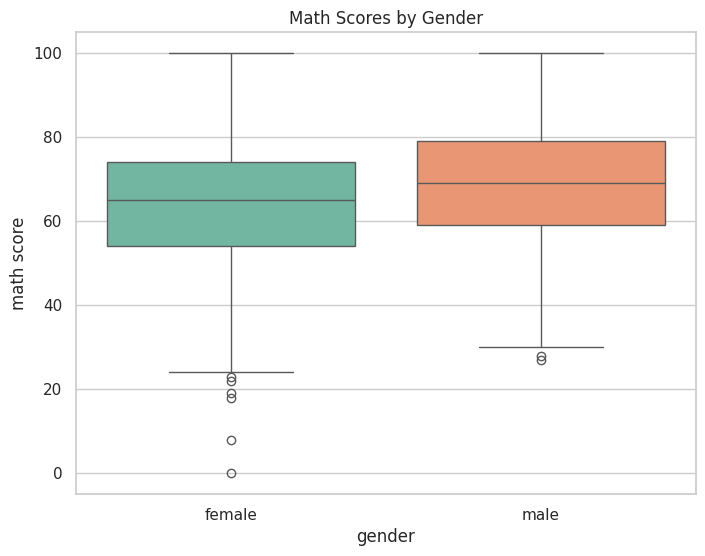

In [11]:
sns.set(style="whitegrid")

# Math Scores by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x="gender", y="math score", data=df, hue="gender", palette="Set2", legend=False)
plt.title("Math Scores by Gender")
plt.show()




The boxplot compares math score distributions between male and female students.  
- Males have a slightly higher median math score than females.  
- The overall spread is similar, though females show more low-end outliers.  
- This suggests that while both genders perform across a wide range, male students on average achieve marginally higher math results.  


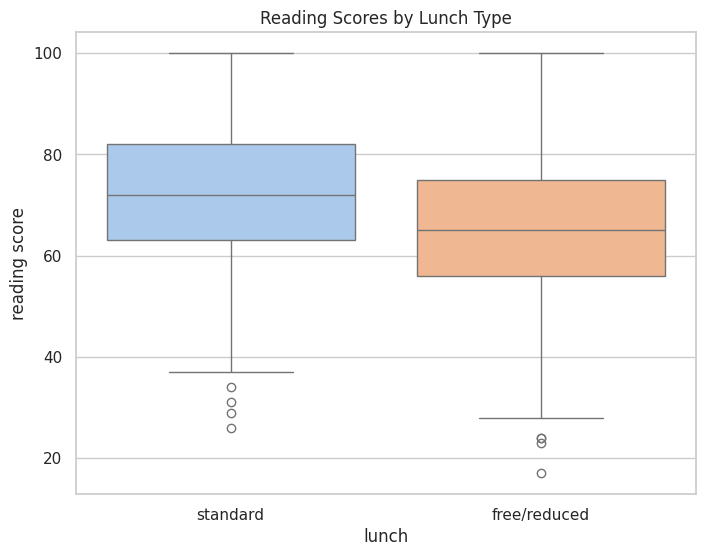

In [12]:
# Reading Scores by Lunch
plt.figure(figsize=(8,6))
sns.boxplot(x="lunch", y="reading score", data=df, hue="lunch", palette="pastel", legend=False)
plt.title("Reading Scores by Lunch Type")
plt.show()




The boxplot shows a clear performance gap between lunch groups.  

- Students with standard lunch have higher median reading scores.  
- The interquartile range is also higher for standard lunch, showing more consistent strong performance.  
- Students with free/reduced lunch generally score lower, with a wider spread and more low outliers.  
- This suggests lunch type, a proxy for socio-economic status, impacts reading performance.  


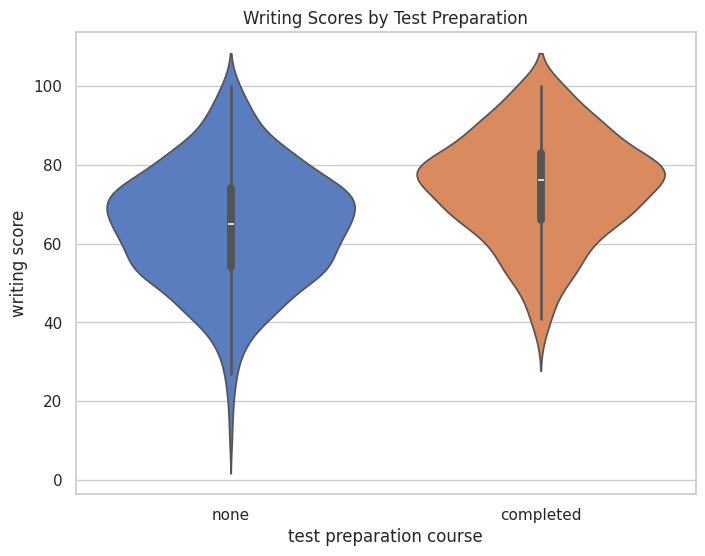

In [13]:


# Writing Scores by Test Preparation
plt.figure(figsize=(8,6))
sns.violinplot(x="test preparation course", y="writing score", data=df, hue="test preparation course", palette="muted", legend=False)
plt.title("Writing Scores by Test Preparation")
plt.show()



The violin plot highlights the effect of test preparation.  

- Students who completed the prep course have a visibly higher concentration of scores in the upper range.  
- Those with no prep cluster more in the mid-to-low range, with fewer high scores.  
- The distribution confirms that preparation has a strong positive effect on writing outcomes.

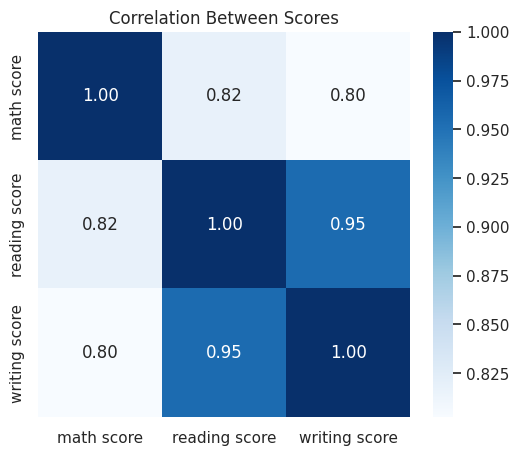

In [14]:
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Scores")
plt.show()

The heatmap shows strong positive correlations among all three subjects:  

- Math and Reading: 0.82
- Math and Writing: 0.80
- Reading and Writing: 0.95

This indicates that students who perform well in one subject are very likely to perform well in the others, especially between reading and writing.  


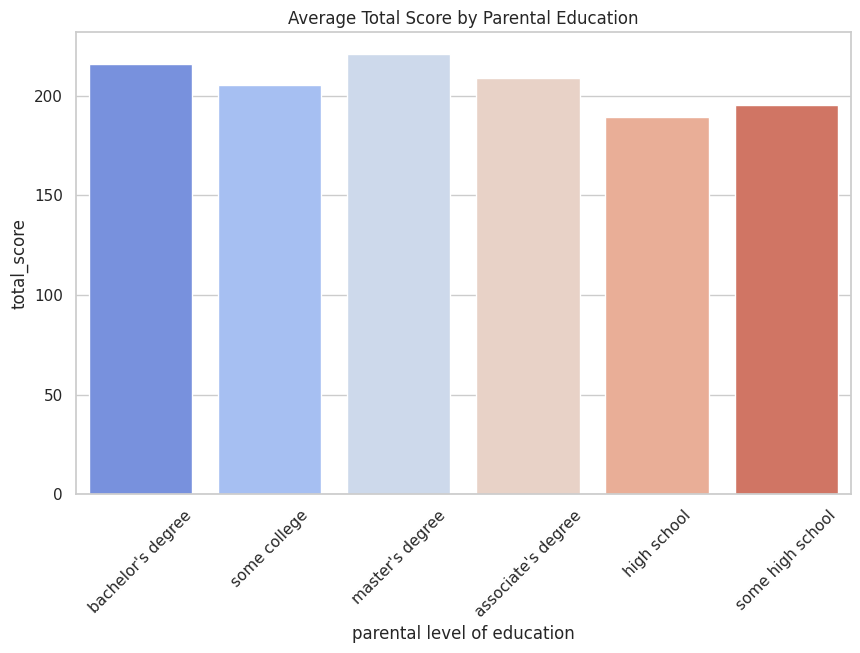

In [16]:
# Total Score vs Parental Education
plt.figure(figsize=(10,6))
sns.barplot(x="parental level of education", y="total_score", data=df, estimator="mean", hue="parental level of education", errorbar=None, palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.title("Average Total Score by Parental Education")
plt.show()

The barplot highlights differences in total exam scores based on parental education level.  

- Students with parents holding a master’s degree or bachelor’s degree achieve the highest average total scores.  
- Scores gradually decrease for students whose parents have lower education levels, with the lowest averages in the high school and some high school groups.  
- This suggests a strong positive relationship between parental education and student performance.  